# Práctica de Visualización

**Equipo:** 9

**Grupo:** 003. Lunes de 6:00 a 9:00 pm

**Integrantes:**
 
* 1808039 Gómez, Karen
* 1937881 Villarreal, Cecilia
* 1741418 Galván, Emmanuel

In [1]:
import pandas as pd

# Base de datos.

Base de datos: [US Police Shootings](https://www.kaggle.com/ahsen1330/us-police-shootings)

**Leer y mostrar los datos sin manipular**

In [2]:
df_PS = pd.read_csv("shootings.csv")

In [3]:
df_PS.shape

(4895, 15)

In [4]:
df_PS.dtypes 

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
arms_category               object
dtype: object

**NOTA:** Algo que vamos a tener que cambiar es modificar el tipo de dato que son algunas columnas asignandoles valores numerico para su estudio

In [5]:
df_PS.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [6]:
df_PS.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera', 'arms_category'],
      dtype='object')

**Eliminar columnas no deseadas**

* name: Se elimina debido a que el nombre de las personas no es relevante para el analisis.
* body_camera: se eliminó porque no nos interesa saber si traían una camara en el cuerpo

In [7]:
df_PS = df_PS.drop(['name','body_camera'], axis=1)

**Manipulación de los datos tipo null**

No hay datos tipo null

In [8]:
df_PS.isnull().sum()

id                         0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
arms_category              0
dtype: int64

**NOTA:** Esto es algo bueno para nosotros porque no tendremos que ver como manejar estos datos

**Reenombrar Celdas**

In [9]:
df_PS = df_PS.rename(columns={'date': 'Dia', 
                              'manner_of_death':'Causa_de_muerte',
                              'armed':'Arma',
                              'age': 'Edad',
                              'gender':'Genero',
                              'race':'Raza', 
                              'city':'Ciudad',
                              'state':'Estado',
                              'signs_of_mental_illness':'Signos_de_enfermedades_mentales',
                              'flee':'Escapo',
                              'threat_level':'Nivel_de_amenaza',
                              'arms_category': 'Categoria_de_armas' })

**NOTA:** Las cambiamos para identificarlos con facilidad en nuestro idioma nativo

[Rename](https://qastack.mx/programming/11346283/renaming-columns-in-pandas)

**Visualización después de limpieza y exportación de los datos**

In [10]:
df_PS.head()

,id,Dia,Causa_de_muerte,Arma,Edad,Genero,Raza,Ciudad,Estado,Signos_de_enfermedades_mentales,Nivel_de_amenaza,Escapo,Categoria_de_armas
0,3,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,Guns
1,4,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,Guns
2,5,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,Unarmed
3,8,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,Other unusual objects
4,9,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,Piercing objects


In [11]:
df_PS.shape

(4895, 13)

In [12]:
df_PS.to_csv('DF_USPS.csv', index = False, header = True)

**NOTA:** Aquí le cambiamos el nombre al archivo con una nomenclatura que nos facilite su búsqueda y reconocimiento

**Estadística básica**

In [13]:
df_PS['Raza'].value_counts()

White       2476
Black       1298
Hispanic     902
Asian         93
Native        78
Other         48
Name: Raza, dtype: int64

In [14]:
df_PS['Raza'].value_counts().sum()

4895

In [15]:
df_PS['Genero'].value_counts()

M    4673
F     222
Name: Genero, dtype: int64

In [16]:
df_PS['Edad'].describe()

count    4895.000000
mean       36.549750
std        12.694348
min         6.000000
25%        27.000000
50%        35.000000
75%        45.000000
max        91.000000
Name: Edad, dtype: float64

**Conteo y proporción de Raza**

<AxesSubplot:title={'center':'Gráfico de barras por raza'}>

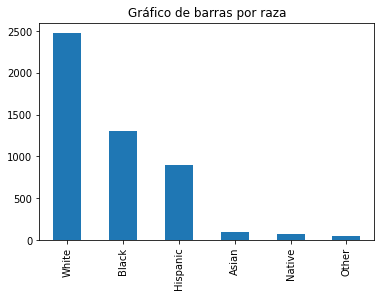

In [23]:
df_PS['Raza'].value_counts().plot.bar(title="Gráfico de barras por raza")

In [20]:
import matplotlib.pyplot as plt

In [21]:
import seaborn as sns

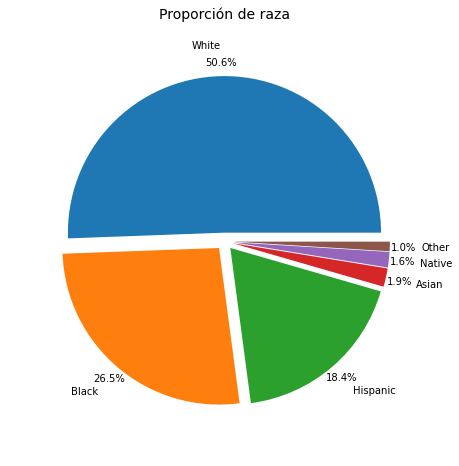

In [73]:
pie, ax = plt.subplots(figsize=[12,8])
labels = df_PS['Raza'].value_counts().keys()
plt.pie(x = df_PS['Raza'].value_counts(),
        autopct = '%.1f%%', explode=[0.05]*6,
        labels=labels,
        pctdistance=1.09,
        labeldistance = 1.2,
        radius = 0.9)
plt.title("Proporción de raza", fontsize=14)
plt.show()

**Estados con mayor incidencia**

<AxesSubplot:title={'center':'Graficos de barra por estados'}>

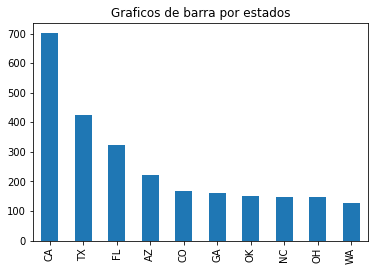

In [22]:
df_PS['Estado'].value_counts().sort_values(ascending = False).head(10).plot.bar(title="Gráfico de barra por estados")

**Análisis de las edades**

<AxesSubplot:title={'center':'Gráfico de línea por edades'}>

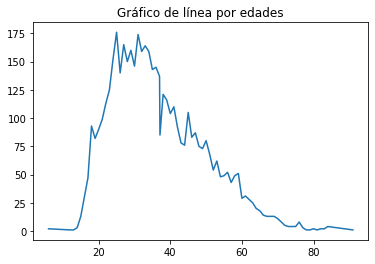

In [24]:
df_PS['Edad'].value_counts().sort_index().plot(title="Gráfico de línea por edades")

<AxesSubplot:xlabel='Edad', ylabel='Density'>

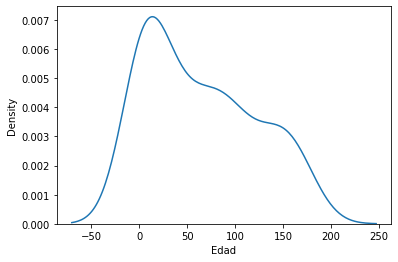

In [151]:
sns.kdeplot(df_PS['Edad'].value_counts().sort_index())

<AxesSubplot:>

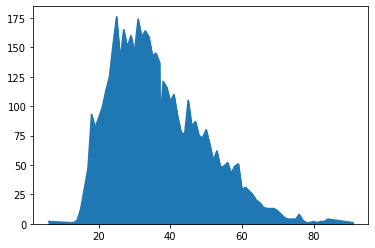

In [79]:
df_PS['Edad'].value_counts().sort_index().plot.area()

<AxesSubplot:ylabel='Frequency'>

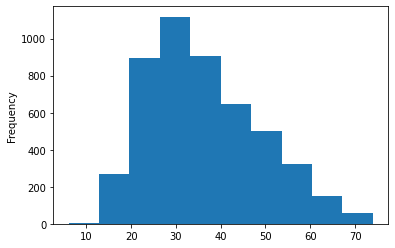

In [84]:
df_PS[df_PS['Edad'] < 75]['Edad'].plot.hist()

d:\program files\python39\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Edad'>

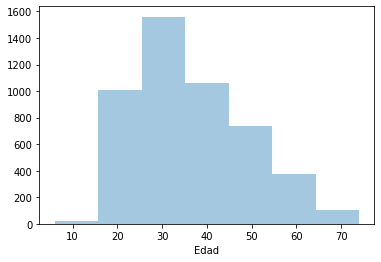

In [156]:
sns.distplot(df_PS[df_PS['Edad'] < 75]['Edad'], bins = 7, kde = False)

C:\Users\almac\anaconda3\envs\R y Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Edad', ylabel='count'>

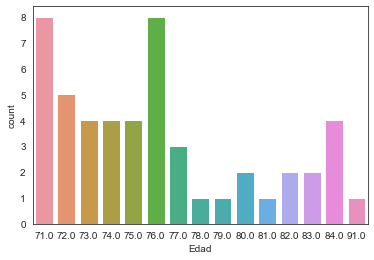

In [88]:
sns.set_style("white")
sns.countplot(df_PS[df_PS['Edad'] >70]['Edad'])

<AxesSubplot:xlabel='Estado', ylabel='Edad'>

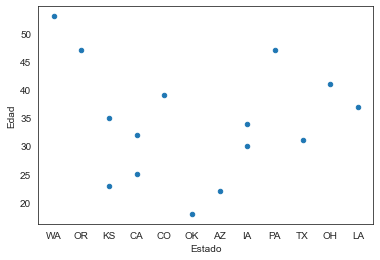

In [81]:
df_PS.head(15).plot.scatter(x='Estado', y='Edad')

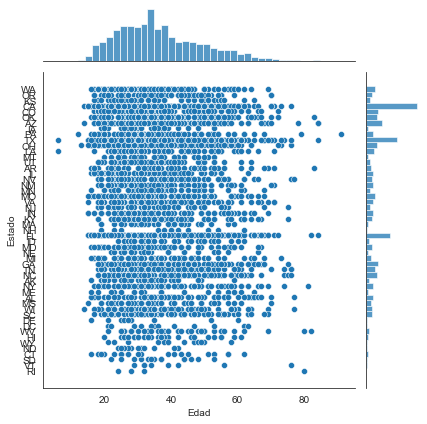

In [128]:
sns.jointplot(x='Edad', y='Estado', data = df_PS)

#En este no se me ocurre como solo mostrar ciertos estados para que se no se vea así de amontonadpo
#Otra opción sería rotar las labels, pero no he podido.

In [138]:
Conteo_incidentes = df_PS['Raza'].groupby([df_PS['Estado'], df_PS['Raza']]).count().unstack().fillna(0)

<AxesSubplot:xlabel='Estado'>

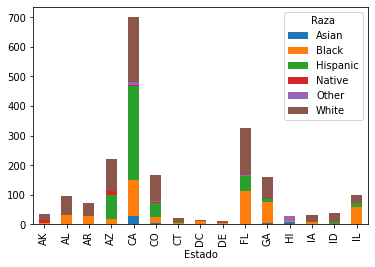

In [147]:
Conteo_incidentes.head(15).plot.bar(stacked = True)

<AxesSubplot:xlabel='Estado'>

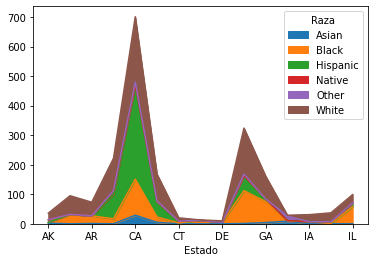

In [148]:
Conteo_incidentes.head(15).plot.area()

<AxesSubplot:xlabel='Estado'>

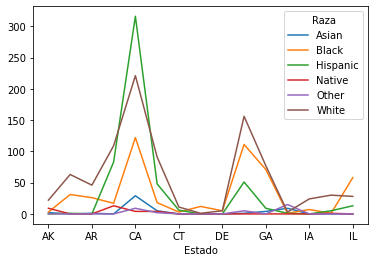

In [149]:
Conteo_incidentes.head(15).plot.line()

<AxesSubplot:xlabel='Raza', ylabel='Edad'>

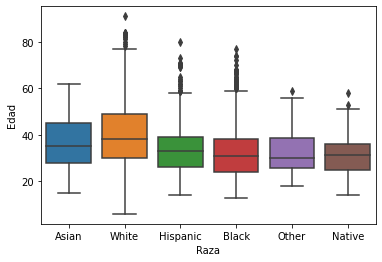

In [163]:
sns.boxplot(x = 'Raza', y = 'Edad', 
            data = df_PS[df_PS.Raza.isin(df_PS.Raza.value_counts().index)])

<AxesSubplot:xlabel='Raza', ylabel='Edad'>

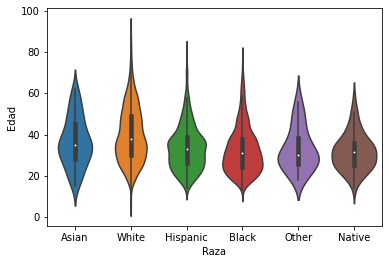

In [164]:
sns.violinplot(x = 'Raza', y = 'Edad', 
            data = df_PS[df_PS.Raza.isin(df_PS.Raza.value_counts().index)])

# Base de datos.

Base de datos: [Company Bankruptcy Prediction](https://www.kaggle.com/fedesoriano/company-bankruptcy-prediction?select=data.csv)

**Leer y mostrar los datos sin manipular**

In [61]:
 df_Bank = pd.read_csv("bankruptcy.csv")

In [62]:
df_Bank.shape

(6819, 96)

In [63]:
df_Bank.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [64]:
df_Bank.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


**NOTA:** Algo a nuestro favor, es que son puros datos numéricos, por lo que es una ventaja para nosotros en cuanto a manipulación de datos

In [65]:
df_Bank.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

**Eliminar columnas no deseadas**

* Pre-tax net Interest Rat: Se elimina debido a que consideramos redundante, ya que te da la tasa continua ya después de impuestos.
* After-tax net Interest Rate: Se elimina debido a que consideramos redundante, ya que te da la tasa continua ya después de impuestos.

**NOTA:** Solo se eliminaron algunas, hasta no ver con más detalle los datos es dificil eliminar tanta información.

In [66]:
df_Bank = df_Bank.drop([' Pre-tax net Interest Rate',' After-tax net Interest Rate'], axis=1)

**Manipulación de los datos tipo null**

No hay datos tipo null

In [67]:
df_Bank.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 94, dtype: int64

**Reenombrar Celdas**

**NOTA:** Solo se cambiaron algunas columnas ya que seguramente se necesiten eliminar varias columnas.
          Se dejaron aquellas columnas que nos ayuden a analizar los posibles factores que llevaron a la empresa a la
          bancarrota

In [68]:
df_PS = df_PS.rename(columns={'ROA(B) before interest and depreciation after tax': 'ROA_después_de_impuestos', 
                              'Continuous interest rate (after tax)':'Tasa_continua',
                              'Cash flow rate':'Flujo_de_caja',
                              'After-tax Net Profit Growth Rate': 'Tasa_de_crecimiento_con_impuestos',
                              'Total Asset Growth Rate':'Tasa_de_crecimiento_de_activos totales',
                              'Cash Reinvestment %':'%_de_reinversión', 
                              'Interest Expense Ratio':'Radio_de_gastos_por_intereses',
                              ' Total debt/Total net worth':'Total_de_deuda',
                              'Long-term fund suitability ratio (A)':'Indice_de_fondo_idoneo_a_largo_plazo',
                              'Borrowing dependency':'Dependencia_de_prestamos',
                              'Contingent liabilities/Net worth':'Pasivos_contingentes',
                              ' Accounts Receivable Turnover': 'Rotacion_de_cuentas_por_cobrar' })

**Visualización después de limpieza y exportación de los datos**

In [69]:
df_Bank.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.302646,0.780985,1.256969e-04,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.303556,0.781506,2.897851e-04,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.302035,0.780284,2.361297e-04,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.303350,0.781241,1.078888e-04,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.303475,0.781550,7.890000e+09,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [70]:
df_PS.shape

(4895, 13)

In [71]:
df_Bank.to_csv('DF_Bank.csv', index = False, header = True)

# Base de datos.

Base de datos: [World University Rankings](https://www.kaggle.com/mylesoneill/world-university-rankings?select=cwurData.csv)

**Leer y mostrar los datos sin manipular**

In [50]:
df_Uni = pd.read_csv("University.csv")

In [51]:
df_Uni.shape

(2200, 14)

In [52]:
df_Uni.dtypes

world_rank                int64
institution              object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

In [53]:
df_Uni.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,NaN,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,NaN,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,NaN,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,NaN,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,NaN,18,85.21,2012


**Eliminar columnas no deseadas**
 * No se planea borrar nada de momento

In [54]:
#df_Uni = df_Uni.drop([""], axis=1)

**Manipulación de los datos tipo null**

Los datos de tipo null de la columna broad_impact se rellenaron con la media del resto de los datos.

In [55]:
df_Uni.isnull().sum()

world_rank                0
institution               0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [56]:
mediaUniImpacto = df_Uni[df_Uni["broad_impact"].isnull() == False].mean()
mediaUniImpacto["broad_impact"]
df_Uni["broad_impact"] = df_Uni["broad_impact"].fillna(mediaUniImpacto["broad_impact"])
del mediaUniImpacto

**Nota:** Para los datos vacíos, reemplazamos los valores por la media de los valores de la columna de impacto global. Esto para que en caso de ser necesario hacer un comparativo entre las universidades en todas las variables de nuestra elección en cualquier momento.

**Reenombrar Celdas**

In [158]:
df_Uni = df_Uni.rename(columns = {'world_rank':'Rango',
                                'institution':'Institución',
                                'country':'País',
                                'national_rank': 'Rango_en _su _país',
                                'quality_of_education':'Calidad_de_educación',
                                'alumni_employment':'Ex_alumnos_rango_de_empleo',
                                'quality_of_faculty':'Rango_calidad_facultad',
                                'publications':'Rango _de_publicaciones',
                                'influence':'Rango de influencia',
                                'citations':'Citas',
                                'broad_impact':'Impacto',
                                'patents':'Patentes' , 
                                'score':'Puntuación', 
                                'year':'Año'})

**Visualización despues de limpieza y exportación de los datos**

In [159]:
df_Uni.head()

,Rango,Institución,País,Rango_en _su _país,Calidad_de_educación,Ex_alumnos_rango_de_empleo,Rango_calidad_facultad,Rango _de_publicaciones,Rango de influencia,Citas,Impacto,Patentes,Puntuación,Año
0,1,Harvard University,USA,1,7,9,1,1,1,1,496.6995,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,496.6995,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,496.6995,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,496.6995,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,496.6995,18,85.21,2012


In [160]:
df_Uni.shape

(2200, 14)

In [161]:
df_Uni.to_csv('DF_Uni.csv', index = False, header = True)

**Conteo de 15 países**

<AxesSubplot:title={'center':'Gráfico de barras por países'}>

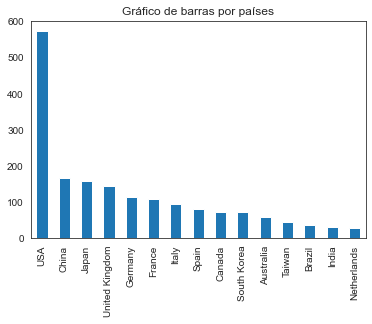

In [162]:
df_Uni['País'].value_counts().head(15).plot.bar(title="Gráfico de barras por países")

<AxesSubplot:title={'center':'Gráfico de barras por países'}, ylabel='País'>

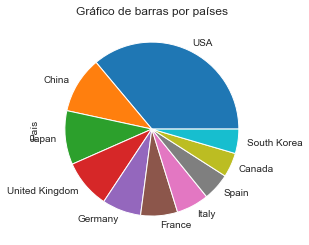

In [95]:
df_Uni['País'].value_counts().head(10).plot.pie(title="Gráfico de barras por países")

**Instituciones con mayor incidencia**

<AxesSubplot:title={'center':'Gráfico de barra por institución'}>

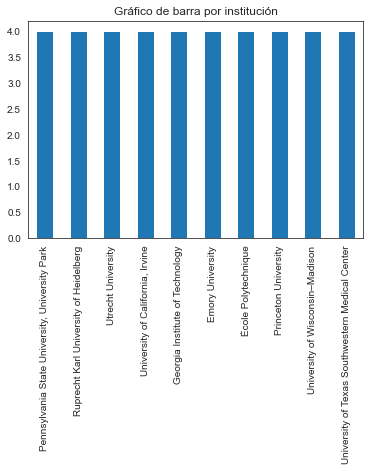

In [96]:
df_Uni['Institución'].value_counts().sort_values(ascending = False).head(10).plot.bar(title="Gráfico de barra por institución")

**Análisis de los países**

<AxesSubplot:title={'center':'Gráfico de línea por países'}>

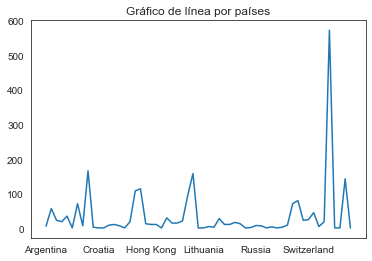

In [103]:
df_Uni['País'].value_counts().sort_index().plot(title="Gráfico de línea por países")

<AxesSubplot:xlabel='País', ylabel='Density'>

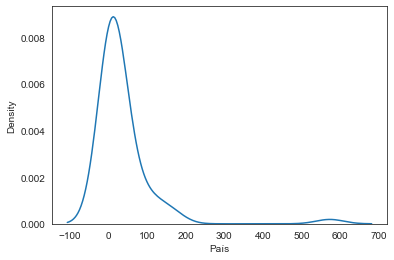

In [104]:
sns.kdeplot(df_Uni['País'].value_counts().sort_index())

<AxesSubplot:>

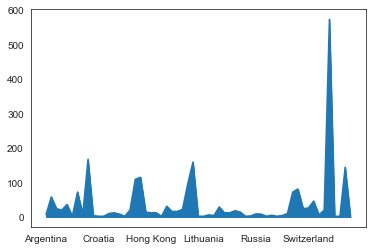

In [108]:
df_Uni['País'].value_counts().sort_index().plot.area()

**Análisis de calidad de educación**

<AxesSubplot:ylabel='Frequency'>

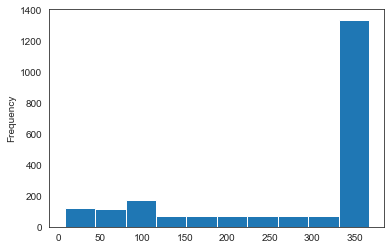

In [111]:
df_Uni[df_Uni['Calidad_de_educación'] > 7]['Calidad_de_educación'].plot.hist()

C:\Users\almac\anaconda3\envs\R y Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Calidad_de_educación'>

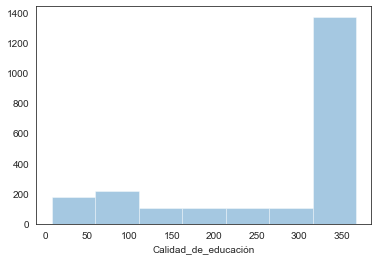

In [110]:
sns.distplot(df_Uni[df_Uni['Calidad_de_educación'] > 7]['Calidad_de_educación'], bins = 7, kde = False)

C:\Users\almac\anaconda3\envs\R y Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calidad_de_educación', ylabel='count'>

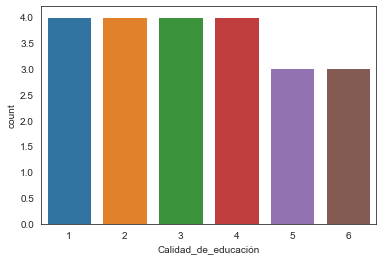

In [113]:
sns.countplot(df_Uni[df_Uni['Calidad_de_educación'] <7]['Calidad_de_educación'])

**Análisis de Puntuación**

<AxesSubplot:xlabel='Año', ylabel='Puntuación'>

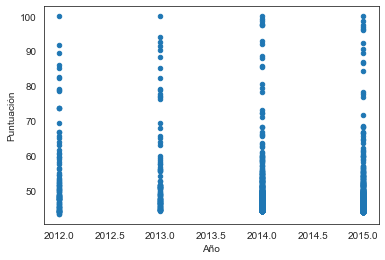

In [120]:
df_Uni.plot.scatter(x='Año', y='Puntuación')

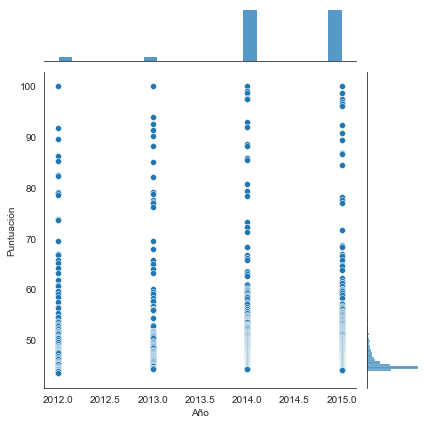

In [118]:
sns.jointplot(x='Año', y='Puntuación', data = df_Uni)

In [143]:
Conteo_universidades = df_Uni['País'].groupby([df_Uni['Institución'], df_Uni['Año']]).count().unstack().fillna(0)

<AxesSubplot:xlabel='Institución'>

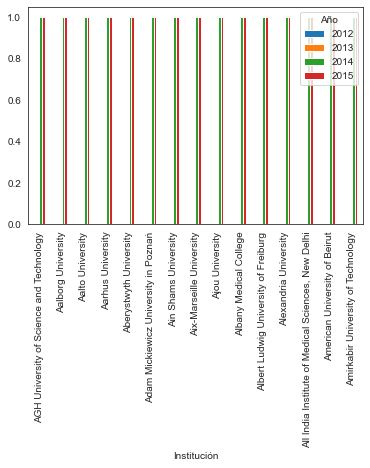

In [144]:
Conteo_universidades.head(15).plot.bar(stacked = False)

<AxesSubplot:xlabel='Institución'>

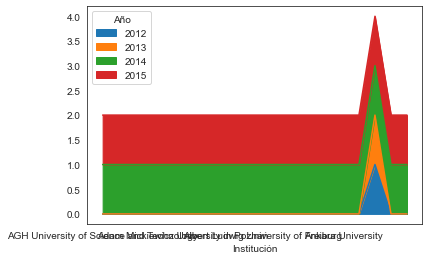

In [148]:
Conteo_universidades.head(20).plot.area()

<AxesSubplot:xlabel='Institución'>

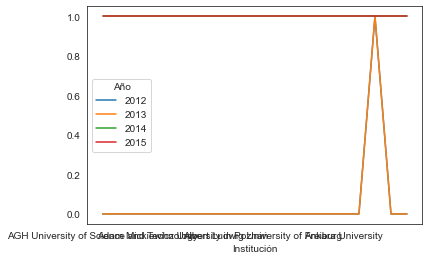

In [146]:
Conteo_universidades.head(20).plot.line()

<AxesSubplot:xlabel='Patentes', ylabel='Puntuación'>

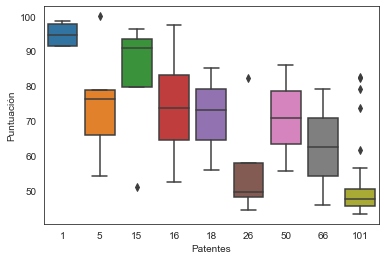

In [165]:
sns.boxplot(x = 'Patentes', y = 'Puntuación', 
            data = df_Uni[df_Uni.Patentes.isin(df_Uni.Patentes.head(10).value_counts().index)])

<AxesSubplot:xlabel='Patentes', ylabel='Puntuación'>

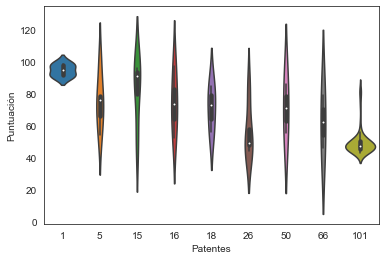

In [166]:
sns.violinplot(x = 'Patentes', y = 'Puntuación', 
            data = df_Uni[df_Uni.Patentes.isin(df_Uni.Patentes.head(10).value_counts().index)])